### Importação dos dados



In [59]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Celular Plus X42,eletronicos,1712.54,88.772042,15/11/2021,Thiago Silva,RJ,1,boleto,1,-22.25,-42.66
2355,Impressora,eletronicos,377.02,20.363958,18/03/2023,Lucas Oliveira,SP,5,boleto,1,-22.19,-48.79
2356,Jogo de tabuleiro,brinquedos,163.82,9.611337,06/07/2021,Lucas Oliveira,PR,5,cartao_credito,4,-24.89,-51.55
2357,Cama box,moveis,921.77,46.665919,02/05/2022,Pedro Gomes,RN,1,cartao_credito,2,-5.81,-36.59


#1. Análise do faturamento


In [74]:
Vendas_Loja = loja['Preço'].sum()
Vendas_Loja2 = loja2['Preço'].sum()
Vendas_Loja3 = loja3['Preço'].sum()
Vendas_Loja4 = loja4['Preço'].sum()
Lojas = ['loja', 'loja2', 'loja3', 'loja4']
Vendas = [Vendas_Loja, Vendas_Loja2, Vendas_Loja3, Vendas_Loja4]
Faturamento = pd.DataFrame(list(zip(Lojas, Vendas)), columns=['Lojas', 'Vendas'])

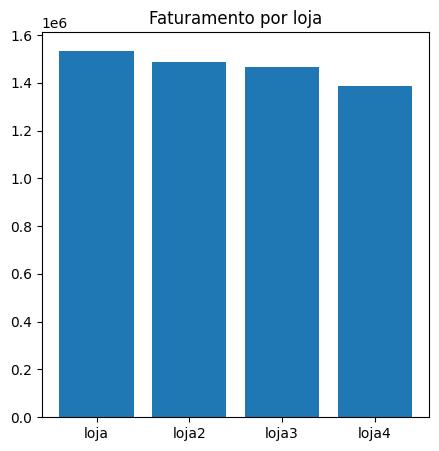

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.bar(Faturamento['Lojas'], Faturamento['Vendas'])
plt.title('Faturamento por loja')
plt.show()

# 2. Vendas por Categoria


In [57]:
categoriaLj = loja['Categoria do Produto'].value_counts()
categoriaLj2 = loja2['Categoria do Produto'].value_counts()
categoriaLj3 = loja3['Categoria do Produto'].value_counts()
categoriaLj4 = loja4['Categoria do Produto'].value_counts()

categoriaCons = [['loja',categoriaLj] , ['loja2',categoriaLj2] , ['loja3',categoriaLj3] , ['loja4',categoriaLj4]]
categoriaCons

[['loja',
  Categoria do Produto
  moveis                   465
  eletronicos              448
  brinquedos               324
  eletrodomesticos         312
  esporte e lazer          284
  instrumentos musicais    182
  livros                   173
  utilidades domesticas    171
  Name: count, dtype: int64],
 ['loja2',
  Categoria do Produto
  moveis                   442
  eletronicos              422
  brinquedos               313
  eletrodomesticos         305
  esporte e lazer          275
  instrumentos musicais    224
  livros                   197
  utilidades domesticas    181
  Name: count, dtype: int64],
 ['loja3',
  Categoria do Produto
  moveis                   499
  eletronicos              451
  brinquedos               315
  eletrodomesticos         278
  esporte e lazer          277
  livros                   185
  instrumentos musicais    177
  utilidades domesticas    177
  Name: count, dtype: int64],
 ['loja4',
  Categoria do Produto
  moveis                   480


In [76]:
quantidadeConsolidado = categoriaLj.add(categoriaLj2, fill_value=0).add(categoriaLj3, fill_value=0).add(categoriaLj4, fill_value=0)
quantidadeConsolidado = quantidadeConsolidado.sort_values(ascending=False)
quantidadeConsolidado

,count
Categoria do Produto,
moveis,1886
eletronicos,1772
brinquedos,1290
eletrodomesticos,1149
esporte e lazer,1113
instrumentos musicais,753
livros,742
utilidades domesticas,730


# 3. Média de Avaliação das Lojas

In [79]:
mediaLoja = loja['Avaliação da compra'].mean()
mediaLoja2 = loja2['Avaliação da compra'].mean()
mediaLoja3 = loja3['Avaliação da compra'].mean()
mediaLoja4 = loja4['Avaliação da compra'].mean()

media_avaliacao = pd.DataFrame({
    'Loja': ['loja', 'loja2', 'loja3', 'loja4'],
    'Média de Avaliação': [round(mediaLoja,2), round(mediaLoja2,2), round(mediaLoja3,2), round(mediaLoja4,2)]
})
media_avaliacao

,Loja,Média de Avaliação
0,loja,3.98
1,loja2,4.04
2,loja3,4.05
3,loja4,4.00


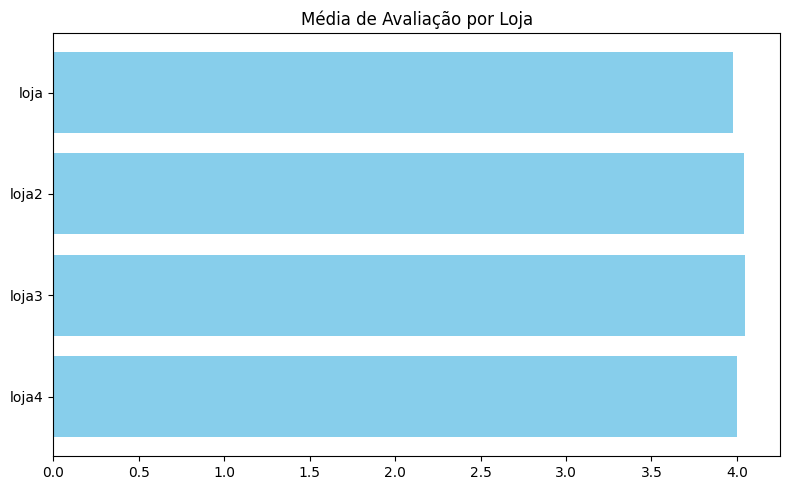

In [73]:
plt.figure(figsize=(8, 5))
plt.barh(media_avaliacao['Loja'], media_avaliacao['Média de Avaliação'], color='skyblue')
plt.title('Média de Avaliação por Loja')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [61]:
produtolj = loja['Produto'].value_counts()
produtolj2 = loja2['Produto'].value_counts()
produtolj3 = loja3['Produto'].value_counts()
produtolj4 = loja4['Produto'].value_counts()

produtodtotal = [['loja',produtolj] , ['loja2',produtolj2] , ['loja3',produtolj3] , ['loja4',produtolj4]]
produtodtotal

[['loja',
  Produto
  Micro-ondas                    60
  TV Led UHD 4K                  60
  Guarda roupas                  60
  Secadora de roupas             58
  Cômoda                         56
  Blocos de montar               56
  Bola de basquete               55
  Bicicleta                      54
  Copo térmico                   54
  Geladeira                      54
  Impressora                     54
  Bateria                        53
  Faqueiro                       52
  Carrinho controle remoto       52
  Modelagem preditiva            51
  Fone de ouvido                 50
  Xadrez de madeira              49
  Celular Plus X42               49
  Lava louças                    48
  Lavadora de roupas             47
  Guitarra                       47
  Violão                         46
  Sofá retrátil                  46
  Cadeira de escritório          46
  Fogão                          45
  Cama box                       44
  Kit banquetas                  44
  Smart 

# 5. Frete Médio por Loja


In [75]:
FreteLoja = loja['Frete'].mean()
FreteLoja2 = loja2['Frete'].mean()
FreteLoja3 = loja3['Frete'].mean()
FreteLoja4 = loja4['Frete'].mean()

mediaFrete = pd.DataFrame({
    'Loja': ['loja', 'loja2', 'loja3', 'loja4'],
    'Média de Avaliação': [round(FreteLoja,2), round(FreteLoja2,2), round(FreteLoja3,2), round(FreteLoja4,2)]
})

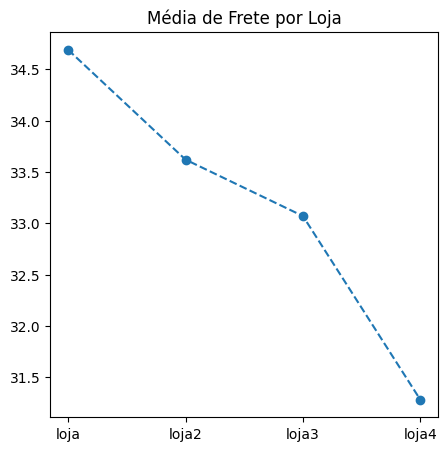

In [71]:
plt.figure(figsize=(5, 5))
plt.plot(mediaFrete['Loja'], mediaFrete['Média de Avaliação'], marker='o', linestyle='--')
plt.title('Média de Frete por Loja')
plt.show()


Analise:

Olá sr João, como você está?

Após analise dos dados das suas lojas para identificar qual deve ser vendida para o investimento em um novo empreendimento, chegamos ao seguinte parecer:
As loja2 e loja3 não devem ser consideradas para vendas, pois entregam um resultado consistente em faturamento, possuem um frete médio e as maiores satisfações dos seus clientes.
A loja1 possui o maior faturamento, mas possui o maior frete e a menor satisfação dos seus clientes.
A loja4 possui o menor faturamento e é a loja que mais vende produtos da categoria de "utilidade domesticas" sendo esse a categoria menos vendida de todas as lojas, mas possui o menor frete.
Sendo assim, sugerimos a venda da Loja4, pois mesmo tendo o menor dos fretes a satisfação é apenas 0,02 maior que a loja 1 e possui o menor faturamento entre todas as lojas.

